In [31]:
import pandas as pd

Lets have a first look on the data and analyse some basic properties plus obvious trends.

In [32]:
sample_input_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/input_2023_w01.csv"
sample_output_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/output_2023_w01.csv"

At first read in the data and look at the dataframe. This is one of the training samples for the competition. The input samples looks like this.

In [33]:
sample_input_df = pd.read_csv(sample_input_csv)
sample_input_df

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285709,2023091100,3987,True,42489,29,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,74.34,14.72,4.32,5.91,294.17,337.15,11,73.870003,11.48
285710,2023091100,3987,True,42489,30,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,74.00,14.88,3.47,6.67,297.89,4.89,11,73.870003,11.48
285711,2023091100,3987,True,42489,31,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,73.74,15.03,2.73,6.85,302.45,37.86,11,73.870003,11.48
285712,2023091100,3987,True,42489,32,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,73.56,15.16,1.94,6.85,308.57,51.94,11,73.870003,11.48


In [34]:
sample_output_df = pd.read_csv(sample_output_csv)
sample_output_df

,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56
...,...,...,...,...,...,...
32083,2023091100,3987,42489,7,73.99,14.60
32084,2023091100,3987,42489,8,74.16,14.30
32085,2023091100,3987,42489,9,74.34,13.96
32086,2023091100,3987,42489,10,74.52,13.59


We can differ between data categories. First category for me would be the identifier block with game_id, play_id, nfl_id and frame_id. The forecast should foresee the specific player (nfl_id) position in a specific frame (frame_id) during a specific play (play_id) in a specific game (game_id). So this information is part of the output as well.

Other blocks could be player information, like player name, player height, player birth date etc. or the movement tracking like x- and y-position or acceleration and orientation. Check the official description for further information. (https://www.kaggle.com/competitions/nfl-big-data-bowl-2026-prediction/data)

In [35]:
print(sample_input_df.columns.tolist())

['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']


Lets reduce the dataset to an atomar part and use only one sample, which we would like to predict in the future.

In [36]:
unique_players = sample_input_df['player_name'].unique().tolist()
unique_players.sort()
print(unique_players)

['A.J. Brown', 'A.J. Epenesa', 'A.J. Terrell', 'AJ Dillon', 'Aaron Jones', 'Adam Prentice', 'Adam Thielen', 'Adam Trautman', "Adoree' Jackson", 'Adrian Amos', 'Adrian Phillips', 'Ahkello Witherspoon', 'Akayleb Evans', 'Akeem Davis-Gaither', 'Alec Ingold', 'Alec Pierce', 'Alex Anzalone', 'Alex Highsmith', 'Alex Singleton', 'Alex Wright', 'Alexander Mattison', 'Allen Lazard', 'Allen Robinson', 'Alohi Gilman', 'Alontae Taylor', 'Amani Hooker', 'Amari Cooper', 'Ambry Thomas', 'Ameer Abdullah', 'Amik Robertson', 'Amon-Ra St. Brown', 'Andre Chachere', 'Andre Cisco', 'Andrew Beck', 'Andrew Ogletree', 'Andrew Van Ginkel', 'Andrew Wingard', 'Anthony McFarland', 'Anthony Nelson', 'Anthony Richardson', 'Anthony Walker', 'Antoine Winfield Jr.', 'Antonio Gibson', 'Antonio Hamilton', "Ar'Darius Washington", 'Arnold Ebiketie', 'Artie Burns', 'Asante Samuel', 'Ashtyn Davis', 'Austin Ekeler', 'Austin Hooper', 'Avonte Maddox', 'Azeez Al-Shaair', 'B.J. Hill', 'Baker Mayfield', 'Ben Sims', 'Ben Skowronek'

In [37]:
zay_df = sample_input_df[sample_input_df['player_name'] == 'Zay Flowers'].copy()
zay_nfl_id = zay_df['nfl_id'].iloc[0]
print(f"The NFL ID of Zay Flowers is {zay_nfl_id}: {(zay_df['nfl_id'] == zay_nfl_id).all()}")

The NFL ID of Zay Flowers is 55886: True


As I am a Baltimore Ravens fanboy **Zay Flowers** is the player which I will pick in a random play and game.

We need to find a play where Zay Flowers was the targeted receiver to get a overview. With the game id and the play id plus nfl id we can find the corresponding data in the output csv.

In [38]:
zay_predict_df = zay_df[zay_df['player_to_predict'] == True]
if len(zay_predict_df) != 0:
    predict_row = zay_predict_df.iloc[0]
    game_id = predict_row['game_id']
    play_id = predict_row['play_id']
    print(f"game_id: {game_id}, play_id: {play_id}")
else:
    print('No play with zay as targeted receiver.')


game_id: 2023091001, play_id: 407


In [39]:
filtered_input_df = sample_input_df[
    (sample_input_df['game_id'] == game_id) &
    (sample_input_df['play_id'] == play_id) &
    (sample_input_df['nfl_id'] == zay_nfl_id)
]
filtered_input_df

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
36533,2023091001,407,True,55886,1,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.20,18.47,0.00,0.00,296.45,130.94,11,81.330002,7.56
36534,2023091001,407,True,55886,2,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.19,18.47,0.00,0.00,252.04,133.23,11,81.330002,7.56
36535,2023091001,407,True,55886,3,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.19,18.45,0.00,0.00,233.97,135.92,11,81.330002,7.56
36536,2023091001,407,True,55886,4,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.18,18.44,0.04,0.82,210.74,141.38,11,81.330002,7.56
36537,2023091001,407,True,55886,5,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.17,18.43,0.19,1.83,209.73,147.79,11,81.330002,7.56
36538,2023091001,407,True,55886,6,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.15,18.38,0.65,3.35,208.49,152.96,11,81.330002,7.56
36539,2023091001,407,True,55886,7,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.10,18.28,1.19,4.06,206.93,152.96,11,81.330002,7.56
36540,2023091001,407,True,55886,8,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.03,18.11,1.81,4.46,203.12,152.96,11,81.330002,7.56
36541,2023091001,407,True,55886,9,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,79.95,17.91,2.33,4.21,202.13,158.21,11,81.330002,7.56
36542,2023091001,407,True,55886,10,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,79.88,17.63,2.90,4.02,198.09,163.34,11,81.330002,7.56


In [40]:
filtered_output_df = sample_output_df[
    (sample_output_df['game_id'] == game_id) &
    (sample_output_df['play_id'] == play_id) &
    (sample_output_df['nfl_id'] == zay_nfl_id)
]
filtered_output_df

,game_id,play_id,nfl_id,frame_id,x,y
3673,2023091001,407,55886,1,79.56,13.00
3674,2023091001,407,55886,2,79.62,12.44
3675,2023091001,407,55886,3,79.70,11.88
3676,2023091001,407,55886,4,79.81,11.30
3677,2023091001,407,55886,5,79.91,10.74
3678,2023091001,407,55886,6,80.03,10.17
3679,2023091001,407,55886,7,80.18,9.60
3680,2023091001,407,55886,8,80.34,9.03
3681,2023091001,407,55886,9,80.50,8.47
3682,2023091001,407,55886,10,80.68,7.91


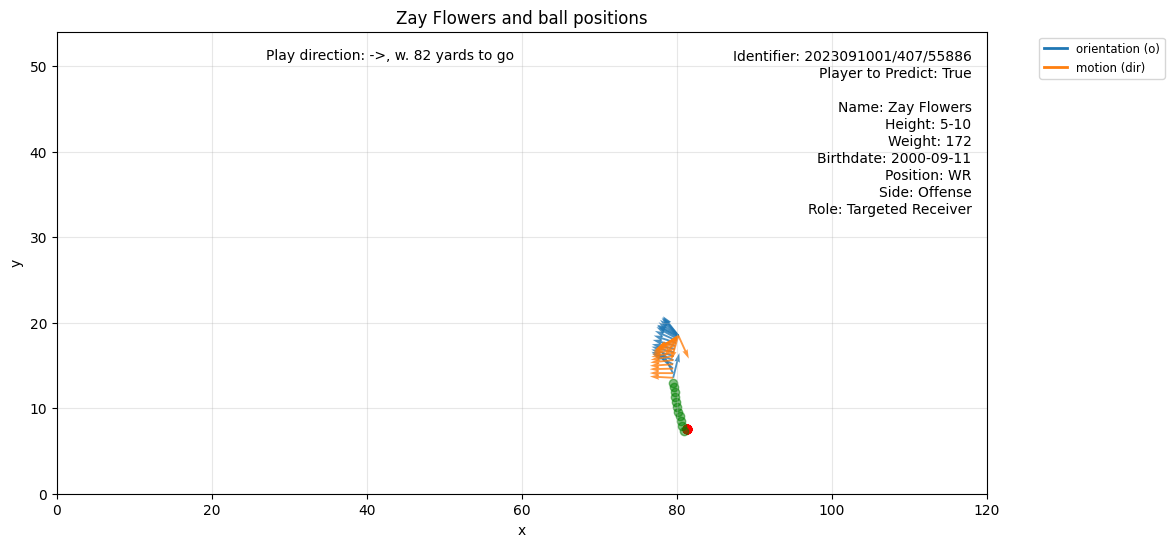

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

info_row = filtered_input_df.iloc[0]

plt.figure(figsize=(12, 6))
# draw arrows for orientation 'o'
theta_o = np.deg2rad(filtered_input_df['o'].astype(float))
dx_o = np.cos(theta_o) * 1.5  # arrow length scale
dy_o = np.sin(theta_o) * 1.5

plt.quiver(filtered_input_df['x'], filtered_input_df['y'], dx_o, dy_o,
           angles='xy', scale_units='xy', scale=0.5,
           color='C0', alpha=0.8, width=0.002)

# draw arrows for motion direction 'dir' (same scale so both are visible)
theta_dir = np.deg2rad(filtered_input_df['dir'].astype(float))
dx_dir = np.cos(theta_dir) * 1.5
dy_dir = np.sin(theta_dir) * 1.5

plt.quiver(filtered_input_df['x'], filtered_input_df['y'], dx_dir, dy_dir,
           angles='xy', scale_units='xy', scale=0.5,
           color='C1', alpha=0.8, width=0.002)

# add a legend using proxy artists
legend_elements = [
    Line2D([0], [0], color='C0', lw=2, label='orientation (o)'),
    Line2D([0], [0], color='C1', lw=2, label='motion (dir)')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.scatter(filtered_input_df['ball_land_x'], filtered_input_df['ball_land_y'], c='red')
plt.scatter(filtered_output_df['x'], filtered_output_df['y'], c='green', alpha=0.5)
plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zay Flowers and ball positions')
plt.grid(True, alpha=0.3)
plt.text(118, 52, f"Identifier: {info_row['game_id']}/{info_row['play_id']}/{info_row['nfl_id']}", ha='right', va='top')
plt.text(118, 50, f"Player to Predict: {info_row['player_to_predict']}", ha='right', va='top')

plt.text(118, 46, f"Name: {info_row['player_name']}", ha='right', va='top')
plt.text(118, 44, f"Height: {info_row['player_height']}", ha='right', va='top')
plt.text(118, 42, f"Weight: {info_row['player_weight']}", ha='right', va='top')
plt.text(118, 40, f"Birthdate: {info_row['player_birth_date']}", ha='right', va='top')
plt.text(118, 38, f"Position: {info_row['player_position']}", ha='right', va='top')
plt.text(118, 36, f"Side: {info_row['player_side']}", ha='right', va='top')
plt.text(118, 34, f"Role: {info_row['player_role']}", ha='right', va='top')

play_direction_symbol = '->' if info_row['play_direction'] == 'right' else '<-' 
plt.text(59, 52, f"Play direction: {play_direction_symbol}, w. {info_row['absolute_yardline_number']} yards to go", ha='right', va='top')
plt.show()

/tmp/ipykernel_41544/4110111442.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(players))


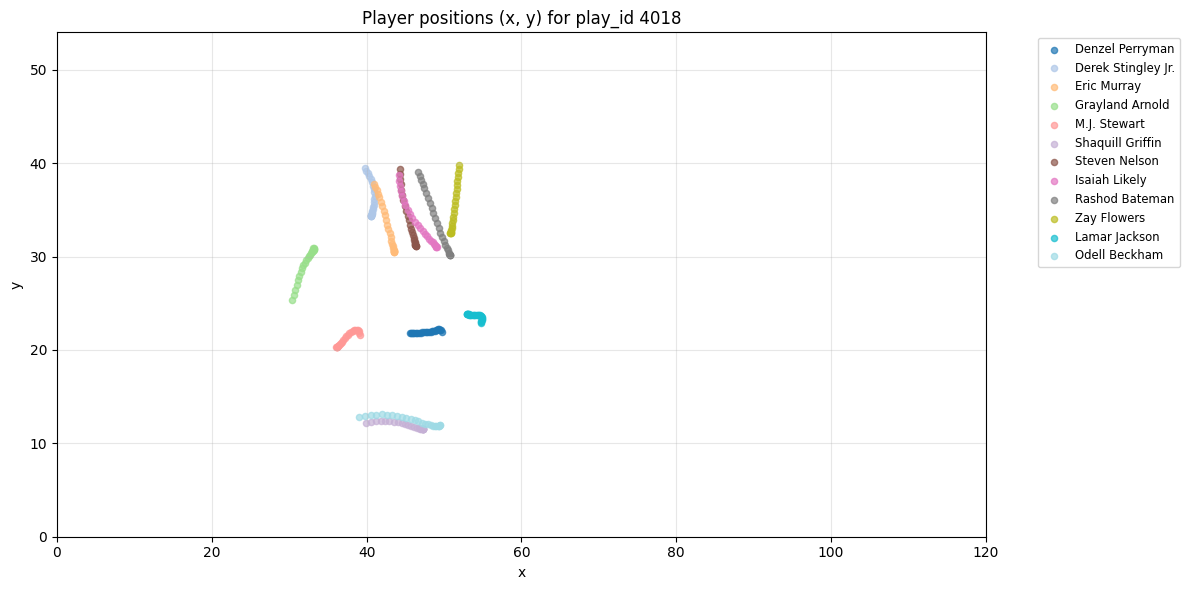

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
players = play_data['player_name'].unique()
colors = plt.cm.get_cmap('tab20', len(players))

for idx, player in enumerate(players):
    player_df = play_data[play_data['player_name'] == player]
    plt.scatter(player_df['x'], player_df['y'], label=player, color=colors(idx), s=20, alpha=0.7)

plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Player positions (x, y) for play_id {}'.format(play_data['play_id'].iloc[0]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()